# Unit 5 - Financial Planning


In [1]:
# Initial imports
import pandas as pd

# For retrieving API keys
import os
import requests
from dotenv import load_dotenv

# For creating API object and parsing content
import alpaca_trade_api as tradeapi
import json

# For MonteCarlo Simulations
from MCForecastTools import MCSimulation

# For importing today's date
from datetime import datetime
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_content = requests.get(btc_url).json()
btc_price = btc_content["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_content = requests.get(eth_url).json()
eth_price = eth_content["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13634.06
The current value of your 5.3 ETH is $1952.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
date = pd.Timestamp("2020-10-16",tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = date,
    end = date
).df

df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3591541  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62796942

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings = [
    {"portfolio" : "crypto", "amount" : (my_btc_value + my_eth_value)},
    {"portfolio" : "shares", "amount" : (my_spy_value + my_agg_value)}
]
df_savings = pd.DataFrame(savings)
df_savings.set_index("portfolio", inplace = True)

# Display savings DataFrame
display(df_savings)

amount
portfolio           
crypto     15586.955
shares     40938.500

<AxesSubplot:ylabel='amount'>

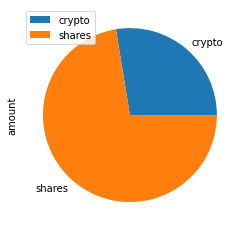

In [12]:
# Plot savings pie chart
df_savings.plot(kind = "pie", y = "amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_sum = float(df_savings.loc["crypto"]) + float(df_savings.loc["shares"])

# Validate saving health
if savings_sum > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif savings_sum == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    deficit = emergency_fund - savings_sum
    print(f"You are ${deficit} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp((datetime.now() - relativedelta(years = 5)), tz = 'America/New_York').isoformat()
end_date = pd.Timestamp(datetime.now(), tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
time                                                                            
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0  202.50   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0  202.85   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0  203.61   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0  202.98   
2015-10-23 00:00:00-04:00  109.79  109.790  109.69  109.74  1344632.0  207.25   

                                                                
                             high       low   close     volume  
time                                                            
2015-10-19 00:00:00-04:00  203.37  202.1300  203.33   61255929  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.3000  207.51  103135843

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_60SPY.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
time                                                                    
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.790  109.69  109.74  1344632.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-10-19 00:00:00-04:00          NaN  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   

                                                   
                              volume daily_return  
time                                               
2015-10-19 00:00:00-04:00   61255929          NaN  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2         3         4         5         6    \
0      1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1      1.008560  0.982779   1.005111  1.007869  0.999122  1.007182  1.004708   
2      1.009705  0.988049   1.006894  1.015233  0.994337  1.001611  1.005045   
3      1.012791  0.973254   1.008986  1.017040  0.998743  0.995092  0.988247   
4      1.015491  0.974871   0.997792  1.027470  0.994248  1.003143  0.994848   
...         ...       ...        ...       ...       ...       ...       ...   
7556  25.361420  2.443182  10.150991  9.867741  1.730427  5.186638  6.158040   
7557  25.243570  2.467619  10.102213  9.879452  1.725891  5.225863  6.171400   
7558  25.282669  2.469992  10.235233  9.721954  1.747774  5.170279  6.145273   
7559  25.229444  2.470453  10.236834  9.760197  1.757918  5.209544  6.074230   
7560  25.183667  2.481144  10.307078  9.887657  1.730058  5.175880  6.126125   

            7         8         9    ...       990        991        992  \
0      1.000000  1.000000  1.000000  ...  1.000000   1.000000   1.000000   
1      1.002801  1.011361  0.993401  ...  1.002019   1.005300   0.993737   
2      0.995698  1.004685  0.995198  ...  1.000903   1.005830   0.988657   
3      0.980769  1.014897  0.994967  ...  1.005782   1.014368   0.995065   
4      0.978293  1.010732  0.999658  ...  1.006604   1.006481   0.992527   
...         ...       ...       ...  ...       ...        ...        ...   
7556  23.401151  7.638997  3.145824  ...  7.313981  19.521393  15.626176   
7557  23.453615  7.606085  3.159596  ...  7.369618  19.674861  15.498376   
7558  23.237238  7.668622  3.163444  ...  7.261417  19.755744  15.542976   
7559  23.025175  7.658472  3.165823  ...  7.329498  19.649403  15.478559   
7560  22.987779  7.670376  3.186032  ...  7.338454  19.494827  15.439843   

           993        994        995        996       997        998       999  
0     1.000000   1.000000   1.000000   1.000000  1.000000   1.000000  1.000000  
1     1.001723   1.004139   0.999294   1.005486  1.007987   1.000692  0.985884  
2     1.001150   1.004109   1.007456   1.004447  0.998340   0.995852  0.982840  
3     0.996620   1.002717   0.999318   1.011775  1.004997   1.010189  0.991734  
4     0.994766   0.993198   0.998922   1.014256  1.014133   1.004778  0.981089  
...        ...        ...        ...        ...       ...        ...       ...  
7556  8.956519  27.027717  11.132988  15.504397  4.656993  13.573539  4.180612  
7557  8.962017  26.667356  11.234835  15.563459  4.707652  13.509205  4.193819  
7558  8.946973  26.870463  11.292229  15.564794  4.747233  13.482909  4.200038  
7559  8.923377  27.049837  11.259606  15.643903  4.793526  13.466327  4.246735  
7560  8.951808  26.828450  11.406433  15.671344  4.820708  13.437365  4.209195  

[7561 rows x 1000 columns]

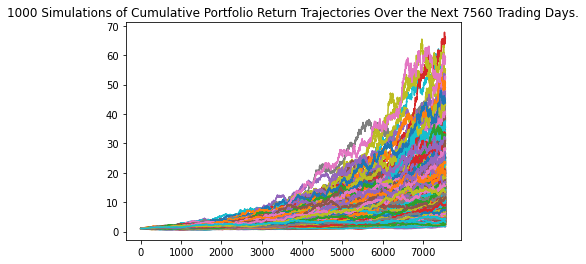

In [19]:
# Plot simulation outcomes
SPY60_sim = MC_60SPY.plot_simulation()

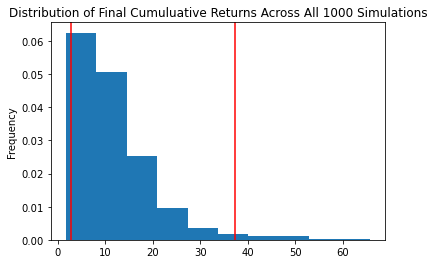

In [20]:
# Plot probability distribution and confidence intervals
SPY60_dist = MC_60SPY.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
SPY60_summary = MC_60SPY.summarize_cumulative_return()

# Print summary statistics
print(SPY60_summary)

count           1000.000000
mean              11.980028
std                8.750233
min                1.726357
25%                6.227404
50%                9.728864
75%               14.997081
max               65.697626
95% CI Lower       2.753646
95% CI Upper      37.322051
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * SPY60_summary[8]
ci_upper = initial_investment * SPY60_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000.00 in the portfolio over the next 30 years will end within in the range of $55072.92 and $746441.01


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * SPY60_summary[8]
ci_upper = initial_investment * SPY60_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $30000.00 in the portfolio over the next 30 years will end within in the range of $82609.39 and $1119661.52


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Increasing composition of portfolio to more heavily favor stocks
MC_80SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_80SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001400  0.995444  1.006403  0.997871  1.007464  0.988565  1.004091   
2     1.011899  0.992631  0.996275  0.981141  1.018336  0.991562  0.998766   
3     1.014424  0.989237  0.999351  0.984884  1.020823  0.982587  0.986311   
4     1.009900  1.003479  0.992314  0.977481  1.013372  0.975879  0.985032   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.574781  2.122116  1.212458  1.162625  1.151232  1.260277  1.223038   
1257  2.558461  2.134019  1.213284  1.153688  1.135594  1.256764  1.252405   
1258  2.548862  2.138592  1.213951  1.154798  1.130237  1.249496  1.255295   
1259  2.566422  2.133603  1.217299  1.150599  1.148500  1.243688  1.258492   
1260  2.531232  2.089619  1.217906  1.149855  1.150597  1.229530  1.264402   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000093  1.011023  0.992497  ...  1.002291  1.009009  0.996813   
2     0.988760  1.017437  0.984398  ...  1.000635  1.002985  0.988979   
3     0.990750  1.021470  0.981265  ...  0.992197  1.006689  0.983728   
4     0.988190  1.017746  0.969613  ...  0.986568  0.996881  0.982812   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.229759  1.422278  2.063645  ...  2.010093  1.927246  0.831780   
1257  2.228818  1.416076  2.035184  ...  2.072475  1.894489  0.828092   
1258  2.219216  1.407586  2.023944  ...  2.062555  1.850344  0.837449   
1259  2.223902  1.403154  2.017212  ...  2.069964  1.806837  0.840392   
1260  2.227452  1.402376  1.999373  ...  2.043071  1.803443  0.821032   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997285  1.004067  0.999568  1.009313  0.989837  0.995888  1.001240  
2     1.009636  1.012607  1.009207  1.012940  0.986970  0.989241  0.991512  
3     1.006499  1.015534  0.994381  1.009888  0.986650  1.001162  0.981033  
4     1.011260  1.002808  0.974882  1.016641  0.990990  1.004185  0.999607  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.247188  1.889288  1.230030  1.200192  1.646575  1.435241  1.748648  
1257  1.246873  1.908976  1.228832  1.213478  1.655358  1.439424  1.745878  
1258  1.250635  1.930670  1.229569  1.229205  1.644765  1.447733  1.740664  
1259  1.255832  1.893634  1.248781  1.211603  1.631327  1.431759  1.751241  
1260  1.247401  1.853328  1.248365  1.224776  1.620012  1.435971  1.713323  

[1261 rows x 1000 columns]

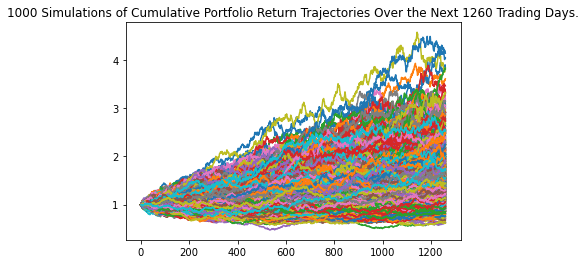

In [26]:
# Plot simulation outcomes
SPY80_sim = MC_80SPY.plot_simulation()

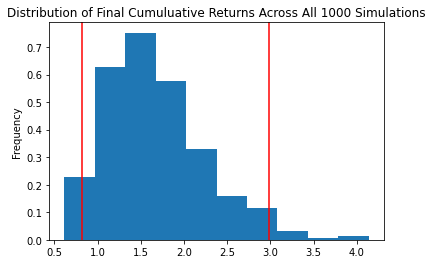

In [27]:
# Plot probability distribution and confidence intervals
SPY80_dist = MC_80SPY.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
SPY80_summary = MC_80SPY.summarize_cumulative_return()

# Print summary statistics
print(SPY80_summary)

count           1000.000000
mean               1.668841
std                0.569620
min                0.614566
25%                1.258993
50%                1.576023
75%                1.981329
max                4.138629
95% CI Lower       0.820937
95% CI Upper       2.989091
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_5yr = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = initial_investment_5yr * SPY80_summary[8]
ci_upper_five = initial_investment_5yr * SPY80_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr:0.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

There is a 95% chance that an initial investment of $20000.00 in the portfolio over the next 5 years will end within in the range of $16418.74 and $59781.81


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Adjusting composition of portfolio to fall between that of 5 year and 30 year
MC_70SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_70SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007640  0.995495  1.004252  1.000127  1.004141  1.004314  0.995204   
2     0.995433  0.986519  1.010437  0.989473  1.004744  0.998389  1.013168   
3     1.000911  0.980263  0.995615  0.987767  0.993566  1.000070  1.015347   
4     0.995373  0.977628  1.005393  0.996573  0.998568  0.985875  1.014912   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.029830  1.407416  1.696795  1.398418  0.590733  3.840062  1.163621   
2517  2.030047  1.427464  1.682881  1.398624  0.586901  3.860572  1.163080   
2518  2.014772  1.434612  1.669186  1.395657  0.582787  3.886449  1.166726   
2519  2.011404  1.437250  1.650147  1.419479  0.583246  3.887295  1.173860   
2520  1.999937  1.439520  1.644787  1.424100  0.579859  3.898327  1.170119   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003530  1.004727  1.015727  ...  0.993793  1.004288  1.008063   
2     1.006800  0.985092  1.008216  ...  0.982012  1.001396  1.012216   
3     1.003905  0.971489  1.011842  ...  0.994476  0.990638  1.005040   
4     1.010294  0.975696  1.003189  ...  0.988533  0.993589  0.997969   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.431981  1.568148  2.760620  ...  2.172991  1.514778  3.209899   
2517  2.446165  1.581130  2.793895  ...  2.159946  1.506146  3.209009   
2518  2.427541  1.578391  2.778317  ...  2.169105  1.520115  3.230823   
2519  2.417356  1.560070  2.807088  ...  2.156102  1.516683  3.253629   
2520  2.445610  1.587345  2.856577  ...  2.184277  1.526742  3.245067   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.982767  1.003060  0.988302  1.002421  0.999205  0.996666  1.005041  
2     0.991166  1.007952  0.977576  1.004007  1.007279  0.988838  1.021515  
3     0.969124  1.005925  0.975024  1.008858  1.005880  0.974729  1.020915  
4     0.973037  1.020466  0.962225  1.005400  0.998196  0.979252  1.015236  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.960597  1.671321  1.719145  2.576499  1.840439  2.005284  1.651371  
2517  1.984561  1.655549  1.730329  2.576123  1.852933  2.015839  1.659034  
2518  1.974215  1.661643  1.715700  2.610534  1.861557  2.039540  1.655147  
2519  1.986369  1.659947  1.725212  2.567978  1.873738  2.042548  1.643363  
2520  2.010484  1.623966  1.734007  2.541616  1.883684  2.016746  1.630364  

[2521 rows x 1000 columns]

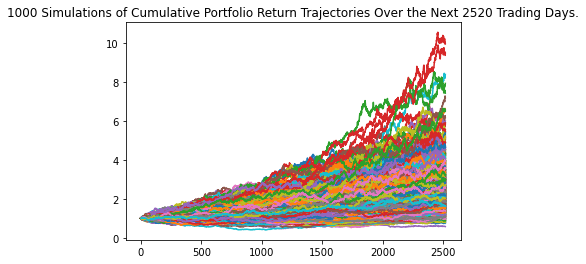

In [32]:
# Plot simulation outcomes
SPY70_sim = MC_70SPY.plot_simulation()

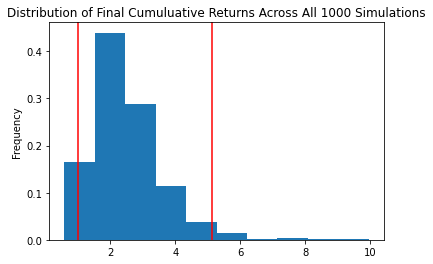

In [33]:
# Plot probability distribution and confidence intervals
SPY70_dist = MC_70SPY.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
SPY70_summary = MC_70SPY.summarize_cumulative_return()

# Print summary statistics
print(SPY70_summary)

count           1000.000000
mean               2.487354
std                1.102743
min                0.579859
25%                1.705476
50%                2.261462
75%                3.012070
max                9.952581
95% CI Lower       1.015007
95% CI Upper       5.140505
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_10yr = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = initial_investment_10yr * SPY70_summary[8]
ci_upper_ten = initial_investment_10yr * SPY70_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr:0.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $20000.00 in the portfolio over the next 10 years will end within in the range of $20300.14 and $102810.10
